In [1]:
import sys

import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline
import soundfile as sf

In [5]:
filename = "../dataset/artifact__201012172012.wav"
wav, fs = sf.read(filename)

In [42]:
print(fs)

44100


In [6]:
wav

array([ 3.05175781e-05, -9.15527344e-05, -3.05175781e-05, ...,
        0.00000000e+00,  3.05175781e-05,  0.00000000e+00])

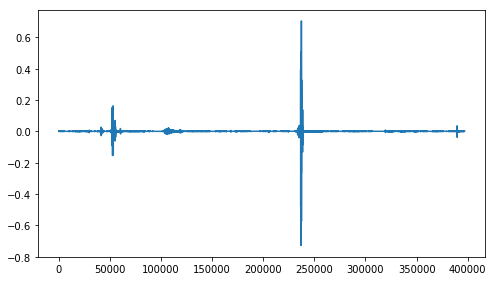

In [43]:
fig = plt.figure(1, figsize=(8, 10))
ax = fig.add_subplot(211)
ax.plot(wav)
plt.show()

In [47]:
xs = wav

In [48]:
n_len = len(xs)
n_fft = 100
n_overlap = 2
n_shift = int(n_fft / n_overlap)

# 中間バッファ
zs = np.zeros(n_len)
Zs = np.zeros(n_fft)

# 出力バッファ
ys = np.zeros(n_len)

In [53]:
print("n_len:", n_len)
print("n_shift:", n_shift)
print(ys)

n_len: 396900
n_shift: 50
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
fft.ifft(Zs, n_fft)

In [35]:
# 窓関数
window = np.hanning(n_fft)

In [36]:
# FFT & IFFT
for start in range(0, n_len - n_shift, n_shift):
    xs_cut = xs[start: start + n_fft]
    xs_win = xs_cut * window
    Xs = fft.fft(xs_win, n_fft)
    
    # some signal processing
    Zs = Xs
    zs = fft.ifft(Zs, n_fft)
    
    # write output buffer
    ys[start: start + n_fft] += np.real(zs)

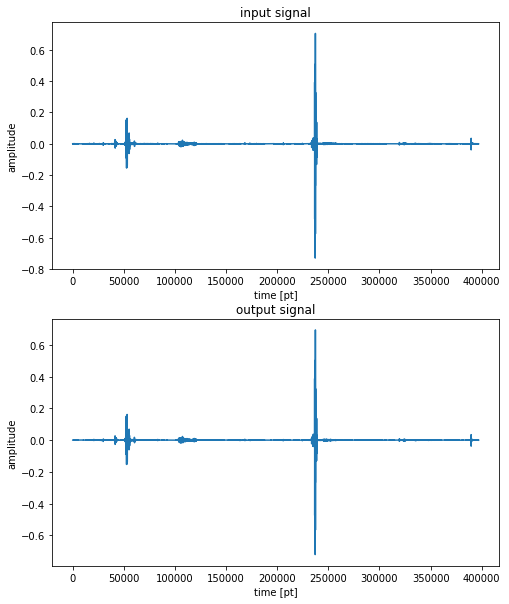

In [37]:
# 波形のプロット
fig = plt.figure(1, figsize=(8, 10))
ax = fig.add_subplot(211)
ax.plot(xs[:fs*10])
ax.set_title("input signal")
ax.set_xlabel("time [pt]")
ax.set_ylabel("amplitude")

ax = fig.add_subplot(212)
ax.plot(ys[:fs*10])
ax.set_title("output signal")
ax.set_xlabel("time [pt]")
ax.set_ylabel("amplitude")

plt.show()

# 高速逆フーリエ変換 （IFFT）

参考：https://algorithm.joho.info/programming/python/numpy-inverse-fast-fourier-transform/

## 時間信号の作成

適当な信号（=周波数2の正弦波+周波数4の正弦波+ランダムノイズ)を生成

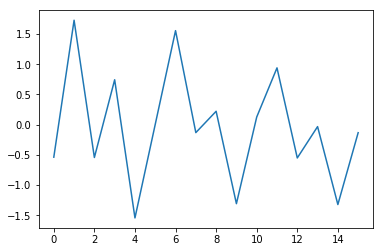

In [55]:
# データのパラメータ
N = 16             # サンプル数
dt = 0.1          # サンプリング間隔
fq1, fq2 = 2, 4    # 周波数
t = np.arange(0, N*dt, dt) # 時間軸

# 時間信号を生成（周波数10の正弦波+周波数20の正弦波+ランダムノイズ）
f = np.sin(2*np.pi*fq1*t) + np.sin(2*np.pi*fq2*t) + 0.3 * np.random.randn(N)

plt.plot(f)
plt.show()

# 時間信号をCSVファイルに出力（小数点第二位まで）
# np.savetxt("data.csv", f, fmt='%.3f')

## フーリエ変換

時間信号を高速フーリエ変換

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


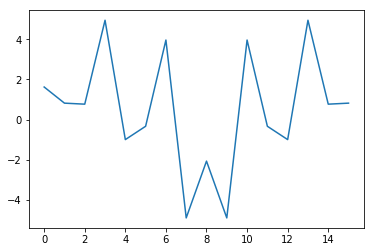

In [56]:
# データのパラメータ
N = 16             # サンプル数
dt = 0.1          # サンプリング間隔
fq1, fq2 = 2, 4    # 周波数
t = np.arange(0, N*dt, dt) # 時間軸

f = np.sin(2*np.pi*fq1*t) + np.sin(2*np.pi*fq2*t) + 0.3 * np.random.randn(N)
#高速フーリエ変換
F = np.fft.fft(f)

plt.plot(F)
plt.show()

## 逆フーリエ変換

周波数信号を高速逆フーリエ変換

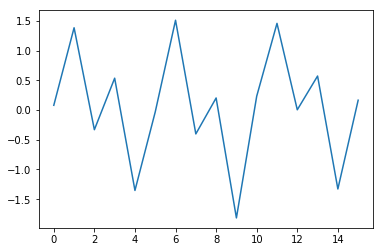

In [58]:
# データのパラメータ
N = 16             # サンプル数
dt = 0.1          # サンプリング間隔
fq1, fq2 = 2, 4    # 周波数
t = np.arange(0, N*dt, dt) # 時間軸

f = np.sin(2*np.pi*fq1*t) + np.sin(2*np.pi*fq2*t) + 0.3 * np.random.randn(N)
#高速フーリエ変換
F = np.fft.fft(f)

# 高速逆フーリエ変換
f = np.fft.ifft(F)

# 実部の値のみ取り出し
f = f.real

plt.plot(f)
plt.show()

# scipy.org

## scipy.signal.fftconvolve

Convolve two N-dimensional arrays using FFT    
Convolve in1 and in2 using the fast Fourier transform method, with the output size determined by the mode argument.

In [59]:
from scipy import signal
sig = np.random.randn(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


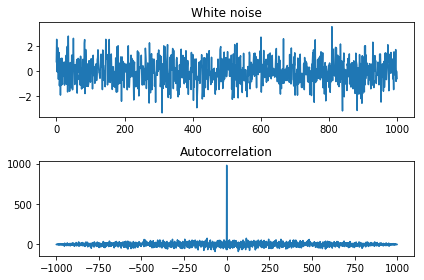

In [60]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()
fig.show()

# Applying a FIR filter

numpyおよびscipyライブラリには、信号にFIRフィルタを適用するために使用できる関数がいくつかあります。 scipy.signalから、lfilter（）は離散IIRフィルタを信号に適用するように設計されているため、分母係数の配列を[1.0]に設定するだけでFIRフィルタを適用できます。 FIRフィルタを適用すると、離散畳み込みと同等であるため、scpyy.signalからnumvol、convolve（）またはfftconvolve（）、scipy.ndimageからconvolve1d（）を使用してconvolve（）を使用することもできます。このページでは、これらの各機能を実証し、データ信号のサイズが固定され、FIRフィルタの長さが変更されたときの計算時間の変化を調べます。データ信号の長さは131072で、2 ** 17です。私たちはmチャンネルのデータを持っていると仮定しているので、入力信号はm行n列です。 1次元のタイミングでは、2×10 ^ 4の大きさのソース配列を、さまざまな数のフィルタ係数で使用します。


In [2]:
#!python
%matplotlib inline
from __future__ import print_function
import time

import numpy as np
from numpy import convolve as np_convolve
from scipy.signal import fftconvolve, lfilter, firwin
from scipy.signal import convolve as sig_convolve
from scipy.ndimage import convolve1d
import matplotlib.pyplot as plt

In [6]:
# Create the m by n data to be filtered.
m = 1
n = 2 ** 18
x = np.random.random(size=(m, n))

conv_time = []
npconv_time = []
fftconv_time = []
conv1d_time = []
lfilt_time = []

diff_list = []
diff2_list = []
diff3_list = []

ntaps_list = 2 ** np.arange(2, 14)

我々のFIRフィルタ係数は1次元の配列bであると仮定する。関数numpy.convolveは1次元配列しか受け付けないので、すべてのチャンネルにわたってコンボリューションを実行するには、入力配列上にPythonループを使用する必要があります。それを行う1つの方法は

In [11]:
for ntaps in ntaps_list:
    # Create a FIR filter.
    b = firwin(ntaps, [0.05, 0.95], width=0.05, pass_zero=False)
    y = np.array([np.convolve(xi, b, mode='valid') for xi in x])
    
    

[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[-0.04317579  0.04019399  0.16704022 ... -0.0280744   0.29221991
   0.29763044]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[ 0.07399534  0.46835503  0.60329754 ...  0.30818739  0.39856197
  -0.1652698 ]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[ 0.0841785   0.02065996  0.12998753 ...  0.61169152  0.07103719
  -0.11620261]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[-0.12276563 -0.38528118 -0.16837303 ...  0.15262927 -0.12963461
  -0.2261284 ]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[-0.23933946 -0.24209203  0.17451315 ... -0.61300246  0.13216513
   0.15960667]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.73364135]]
[[ 0.18894447 -0.32728632  0.28043731 ... -0.14792626  0.14147183
   0.16681858]]
[[0.98776818 0.52973706 0.00721217 ... 0.76646839 0.20036996 0.7

In [10]:
print(len(ntaps_list))

12


In [ ]:
fig = plt.figure(1, figsize=(8, 10))
ax = fig.add_subplot(211)
ax.plot(x)
plt.show()

KeyboardInterrupt: 

In [65]:
for ntaps in ntaps_list:
    # Create a FIR filter.
    b = firwin(ntaps, [0.05, 0.95], width=0.05, pass_zero=False)
    
    # --- signal.convolve ---
    tstart = time.time()
    conv_result = sig_convolve(x, b[np.newaxis, :], mode='valid')
    conv_time.append(time.time() - tstart)

リストの理解度を使ってxの行をループし、その結果をnp.arrayに渡して、フィルタリングされたデータを2次元配列に再構成します。 1次元の場合、scipy.signal.convolveはnp.convolveを使用する可能性があることに注意してください。 signal.convolveとsignal.fftconvolveは、2次元配列の2次元畳み込みを実行します。これらの関数のいずれかを使用してm行n列の配列をフィルタリングするには、len（b）による形状1の2次元配列をフィルタの形にします。 Pythonコードは次のようになります。